In [1]:
import os
import json
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import numpy as np



def calculate_metrics(test1_values, test2_values):
    # Calculate the sets of elements in each list
    set_test1 = set(test1_values)
    set_test2 = set(test2_values)
    
    # Calculate the count of elements exclusive to each set
    exclusive_to_test1 = len(set_test1 - set_test2)
    exclusive_to_test2 = len(set_test2 - set_test1)
    
    # Calculate the total count of exclusive elements
    total_exclusive_count = exclusive_to_test1 + exclusive_to_test2
    sequence_matcher = SequenceMatcher(None, test1_values, test2_values)
    diff_opcodes = list(sequence_matcher.get_opcodes())
    diff=0
    for opcode in diff_opcodes:
        if(opcode[0] != 'equal'):
            diff+=1
    return total_exclusive_count, diff

def generate_plots(data, fname, fpath, search_engine_results):
    # Extract keys, x1 values, and x2 values
    keys = list(data.keys())
    x1_values = [t[0] for t in data.values()]
    x2_values = [t[1] for t in data.values()]
    if('profile_based' not in fpath):
        for key in search_engine_results.keys():
            if(key in fpath):
                for key_cat in search_engine_results[key].keys():
                    if(key_cat in fname):
                        search_engine_results[key][key_cat]+=x1_values[0] + x2_values[0]    

    # Set up the figure and axis
    fig, ax = plt.subplots()

    # Define the width of each bar
    bar_width = 0.35

    # Create an array of positions for the tuples
    positions = np.arange(len(keys))

    # Plot x1 values as red bars
    ax.bar(positions - bar_width/2, x1_values, width=bar_width, color='red', label='Exclusive Links')

    # Plot x2 values as blue bars, side by side with x1 values
    ax.bar(positions + bar_width/2, x2_values, width=bar_width, color='blue', label='Edit Distance')

    # Add labels and legend
    ax.set_ylabel('Count')
    if('indirect' in fpath):
        if('google' in fpath):
            ax.set_title('Google IP ' + fname.split('.')[0] + ' Results')
        if('bing' in fpath):
            ax.set_title('Bing IP ' + fname.split('.')[0] + ' Results')
        if('ddg' in fpath):
            ax.set_title('DuckDuckGo IP ' + fname.split('.')[0] + ' Results')
    elif('profile_based' in fpath):
        if('google' in fpath):
            ax.set_title('Google PB Results')
        if('bing' in fpath):
            ax.set_title('Bing PB Results')
        if('ddg' in fpath):
            ax.set_title('DuckDuckGo PB Results')
        
    else:
        if('google' in fpath):
            ax.set_title('Google DP ' + fname.split('.')[0] + ' Results')
        if('bing' in fpath):
            ax.set_title('Bing DP ' + fname.split('.')[0] + ' Results')
        if('ddg' in fpath):
            ax.set_title('DuckDuckGo DP ' + fname.split('.')[0] + ' Results')        
    ax.set_xticks(positions)
    ax.set_xticklabels(keys)
    ax.legend()

    # Show the plot
    plt.savefig(directory_to_plots + '/' + ax.title.get_text() + '.jpg')
def read_json_files(directory_path, search_engine_results):
    # Check if the given path is a directory
    if not os.path.isdir(directory_path):
        print(f"{directory_path} is not a valid directory.")
        return
    google_profile={}
    bing_profile={}
    ddg_profile={}
    # Iterate through each subdirectory in the given directory
    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            # Check if the file has a .json extension
            if file_name.endswith(".json"):
                file_path = os.path.join(root, file_name)
                
                # Open and read the JSON file
                with open(file_path, 'r') as json_file:
                    try:
                        data = json.load(json_file)
                        # Check if the file has 'test1' and 'test2' attributes
                        if 'test' in data and 'control' in data:
                            test_values = data['test']
                            control_values = data['control']
                            profile_results = calculate_metrics(test_values, control_values)
                            if('google' in file_path):
                                if('Male' in file_path):
                                    google_profile['Male']=data['test']
                                if('Female' in file_path):
                                    google_profile['Female']=data['test']
                                if('Nonbinary' in file_path):
                                    google_profile['Nonbinary']=data['test']                                
                            elif('bing' in file_path):
                                if('Male' in file_path):
                                    bing_profile['Male']=data['test']
                                if('Female' in file_path):
                                    bing_profile['Female']=data['test']
                                if('Nonbinary' in file_path):
                                    bing_profile['Nonbinary']=data['test']
                            elif('ddg' in file_path):
                                if('Male' in file_path):
                                    ddg_profile['Male']=data['test']
                                if('Female' in file_path):
                                    ddg_profile['Female']=data['test']
                                if('Nonbinary' in file_path):
                                    ddg_profile['Nonbinary']=data['test']
                        elif 'test1' in data and 'test2' in data and 'control1' in data:
                            results = {}
                            test1_values = data['test1']
                            test2_values = data['test2']
                            control1_values = data['control1']
                            control2_values = data['control2']
                            results['pre(t)-post(t)'] = calculate_metrics(test1_values, test2_values)
                            results['pre(c)-post(c)'] = calculate_metrics(control1_values, control2_values)
                            results['pre(t)-pre(c)'] = calculate_metrics(test1_values, control1_values)
                            results['post(t)-post(c)'] = calculate_metrics(test2_values, control2_values)
                            
                            generate_plots(results, file_name, file_path, search_engine_results)
                            # print(f"File: {file_path}")
                            # print(f"- test1: {test1_values}")
                            # print(f"- test2: {test2_values}")
                            # print(f"- Exclusive count: {results[0]}")
                            # print(f"- Difference: {results[1]}")
                        else:
                            print(f"File {file_path} does not have 'test1' and 'test2' attributes.")
                    
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON in file {file_path}: {e}")
    
    # Print the total count of exclusive elements across all files
    profile = {}
    profile['Male-Female'] = calculate_metrics(google_profile['Male'], google_profile['Female'])
    profile['Male-Nonbinary'] = calculate_metrics(google_profile['Male'], google_profile['Nonbinary'])
    profile['Female-Nonbinary'] = calculate_metrics(google_profile['Female'], google_profile['Nonbinary'])
    generate_plots(profile, '','profile_based_google', search_engine_results)
    profile = {}
    profile['Male-Female'] = calculate_metrics(bing_profile['Male'], bing_profile['Female'])
    profile['Male-Nonbinary'] = calculate_metrics(bing_profile['Male'], bing_profile['Nonbinary'])
    profile['Female-Nonbinary'] = calculate_metrics(bing_profile['Female'], bing_profile['Nonbinary'])
    generate_plots(profile, '' ,'profile_based_bing', search_engine_results)
    profile = {}
    profile['Male-Female'] = calculate_metrics(ddg_profile['Male'], ddg_profile['Female'])
    profile['Male-Nonbinary'] = calculate_metrics(ddg_profile['Male'], ddg_profile['Nonbinary'])
    profile['Female-Nonbinary'] = calculate_metrics(ddg_profile['Female'], ddg_profile['Nonbinary'])
    generate_plots(profile, '','profile_based_ddg', search_engine_results)
    
# Specify the directory path you want to explore

/tmp/ipykernel_8175/1468114239.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


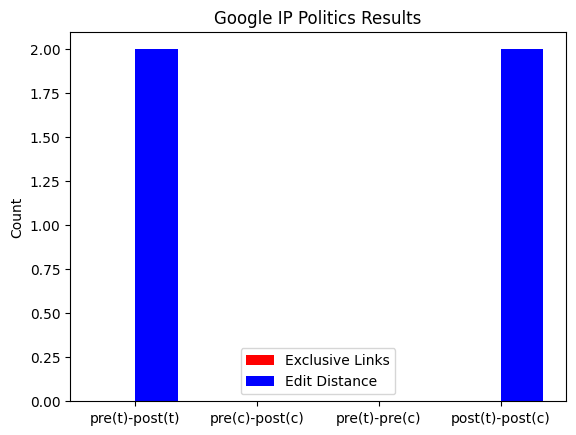

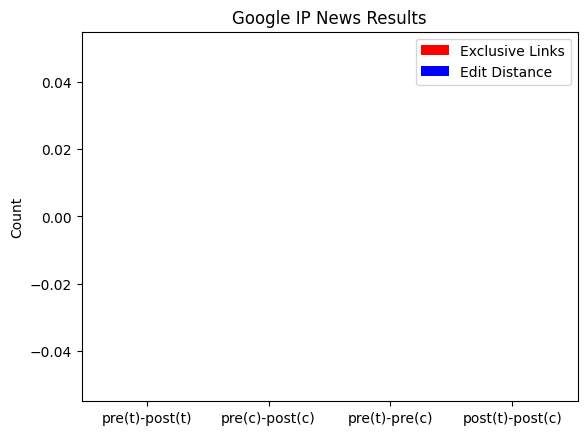

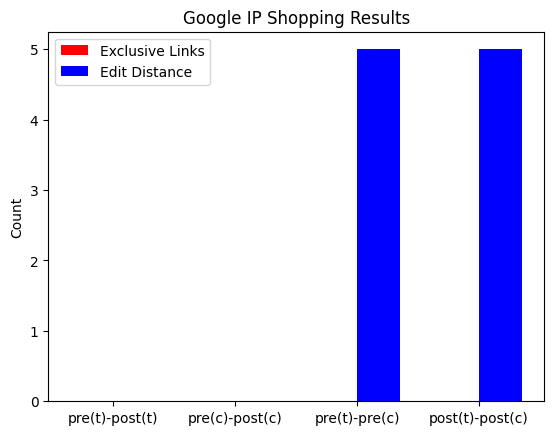

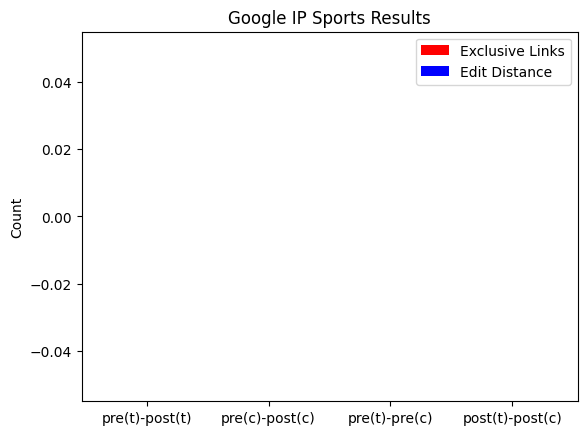

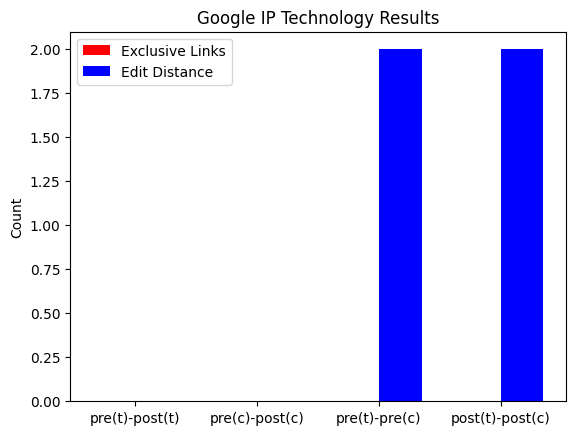

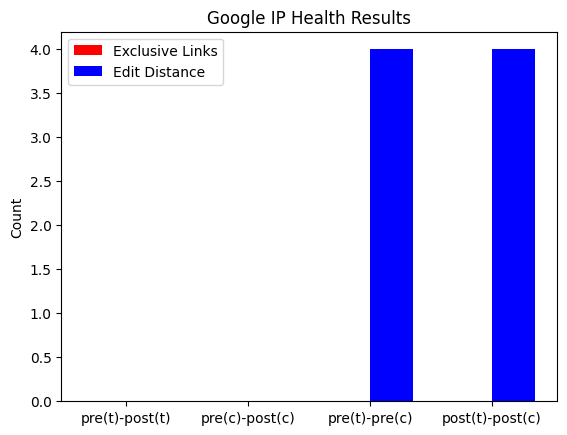

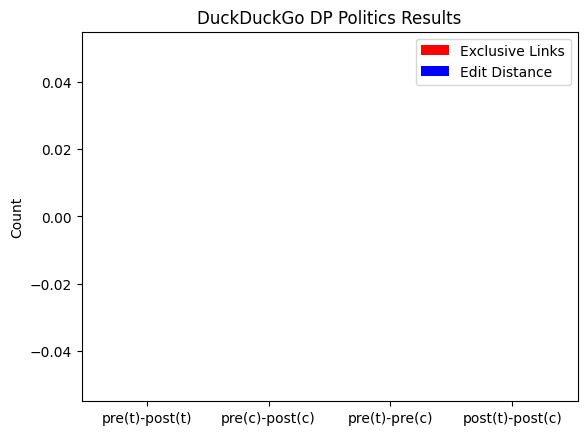

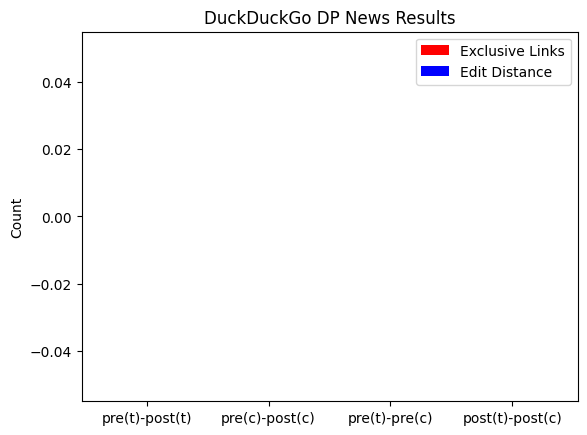

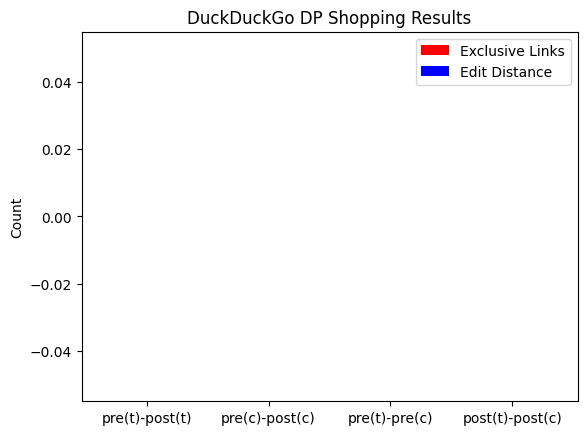

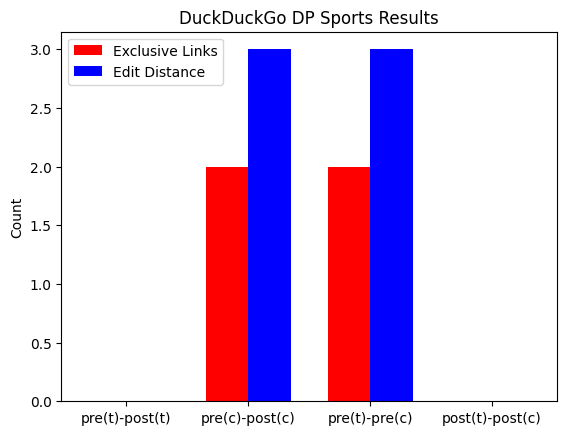

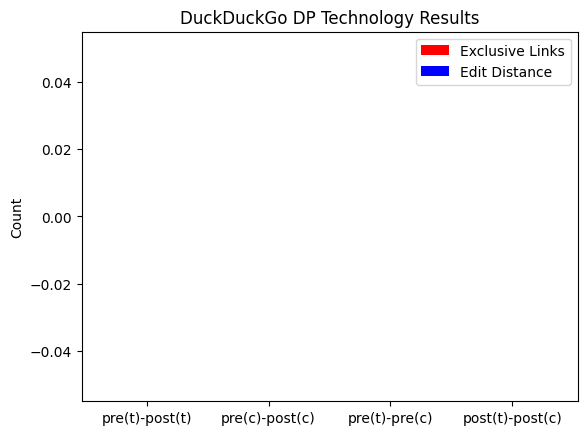

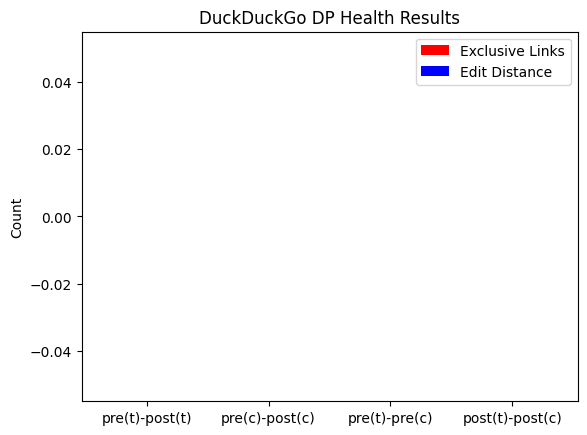

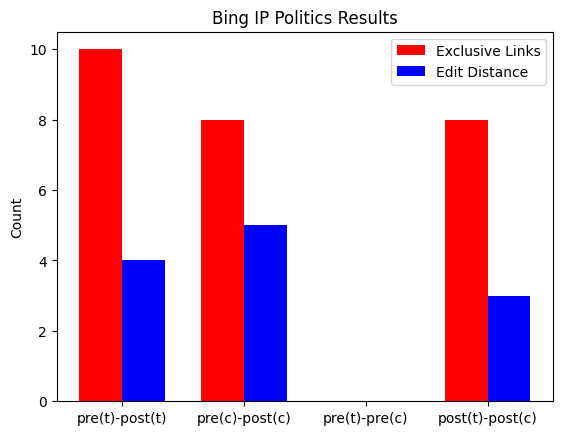

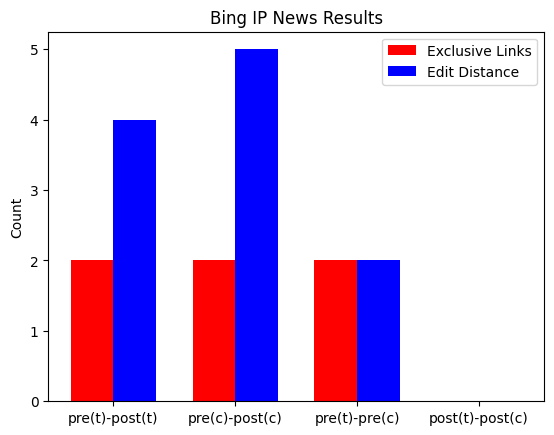

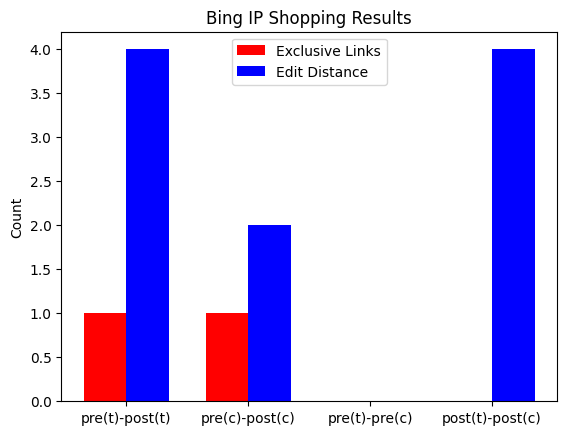

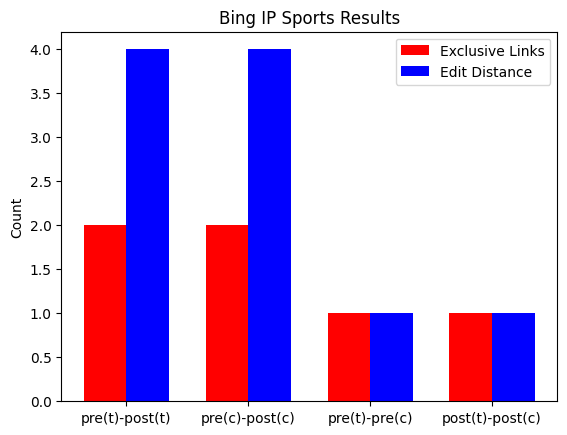

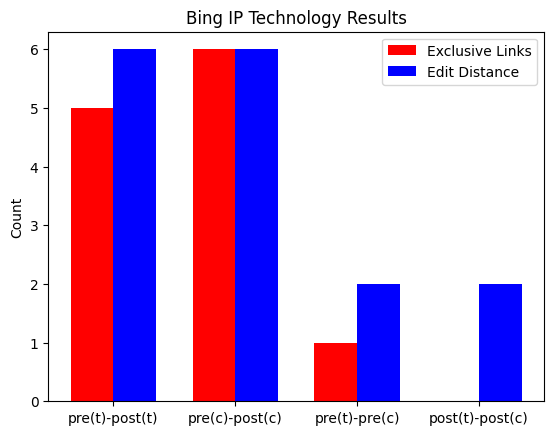

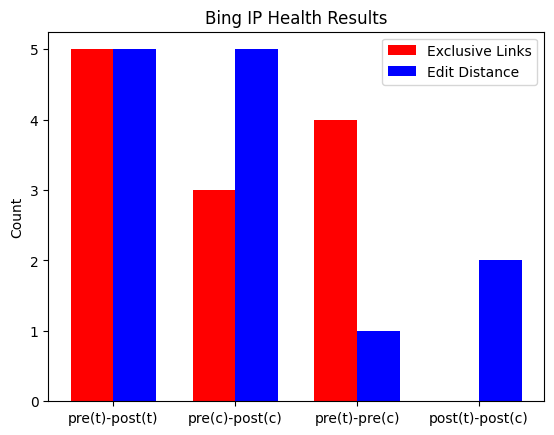

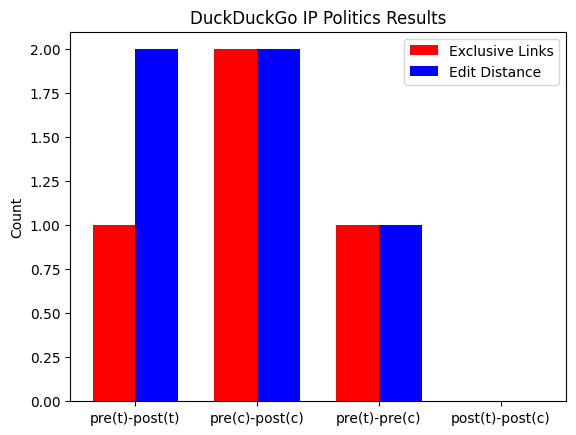

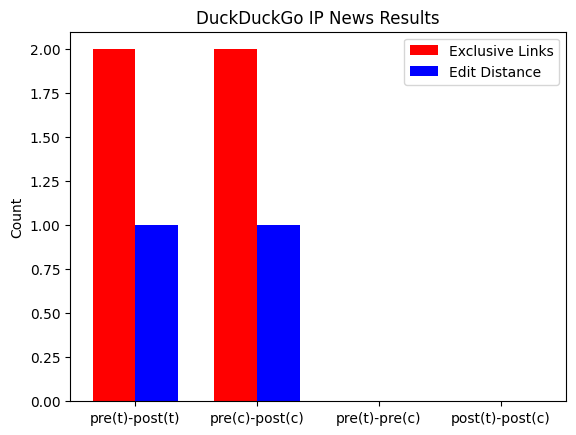

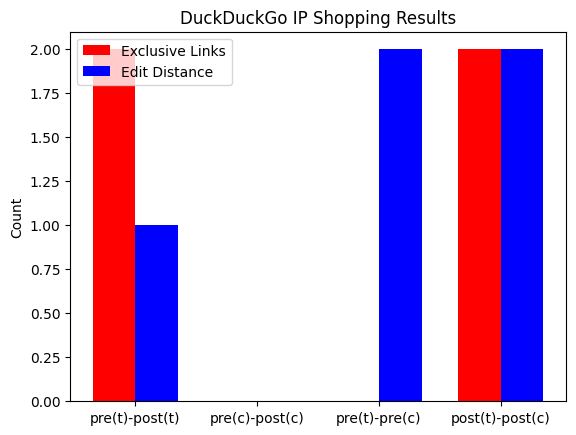

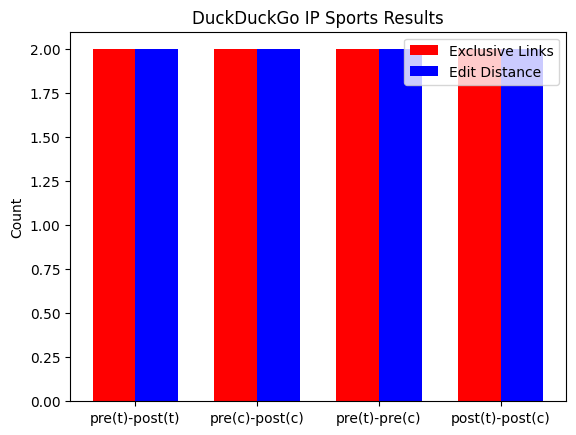

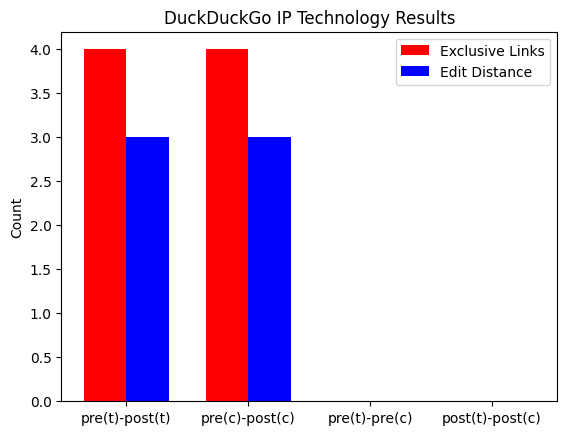

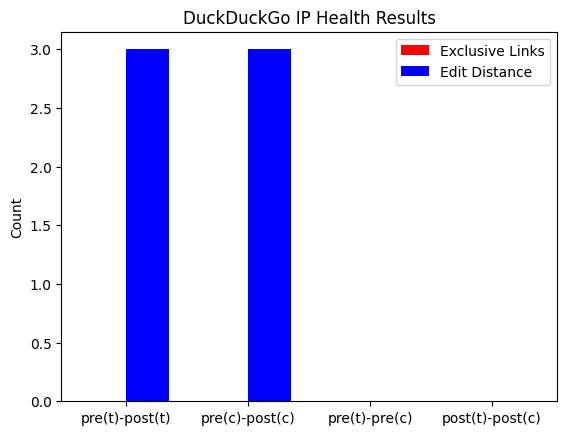

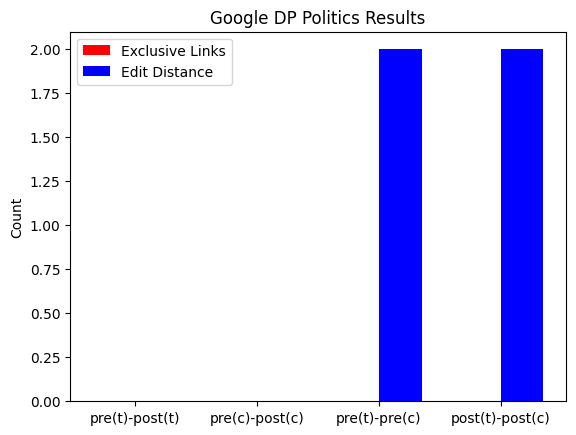

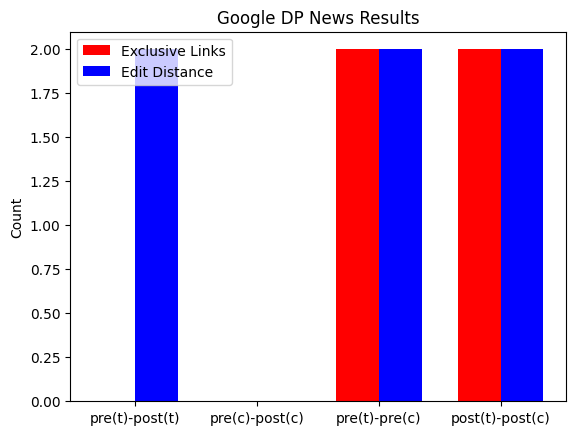

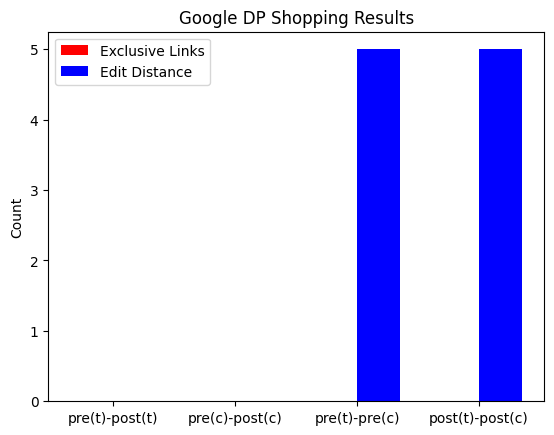

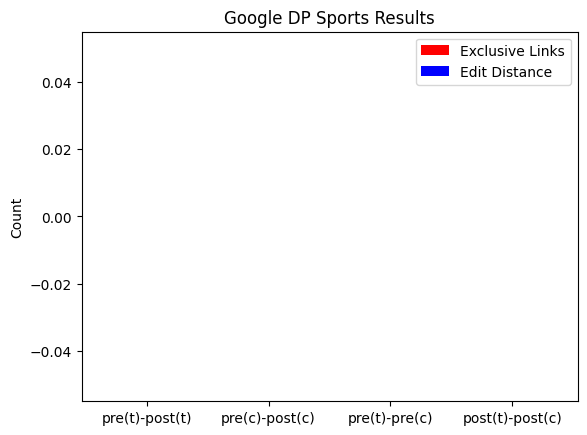

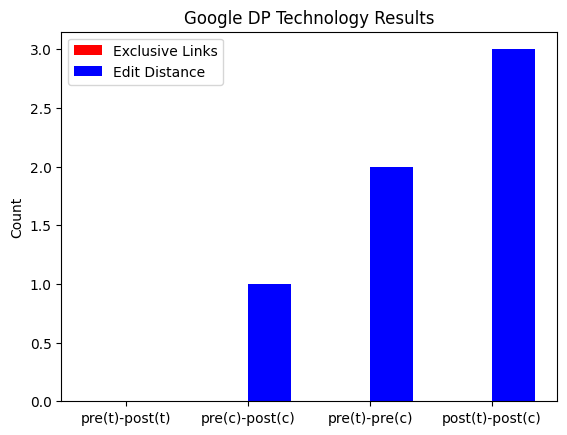

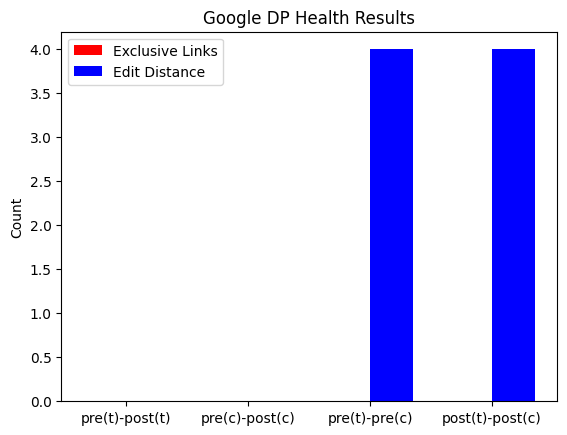

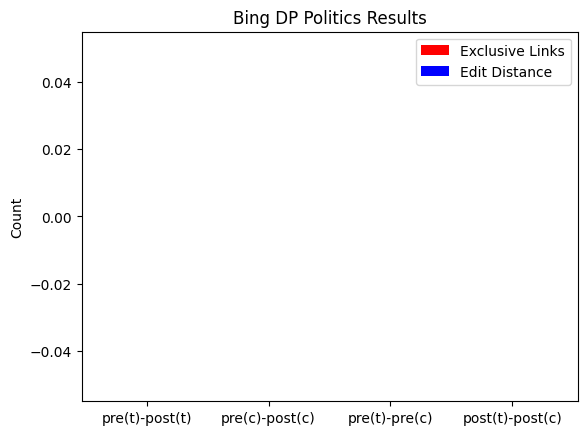

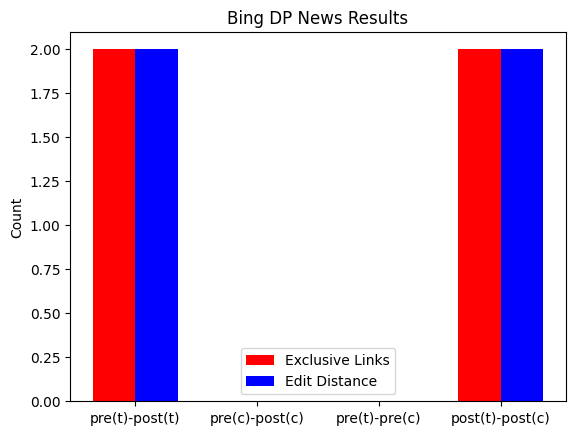

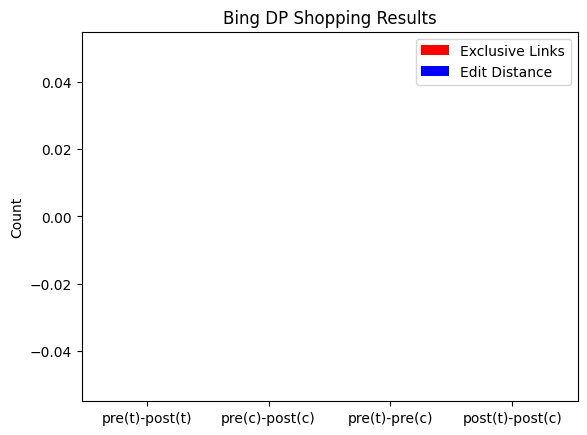

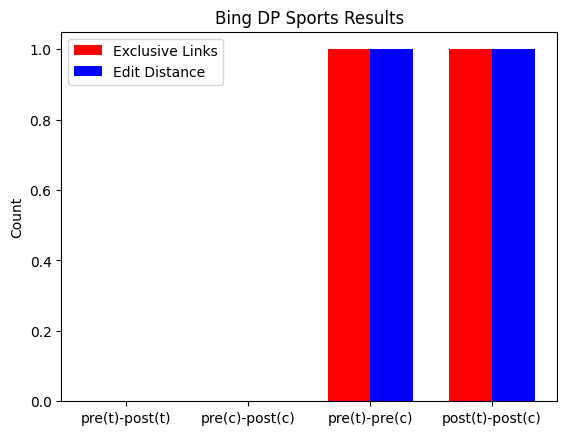

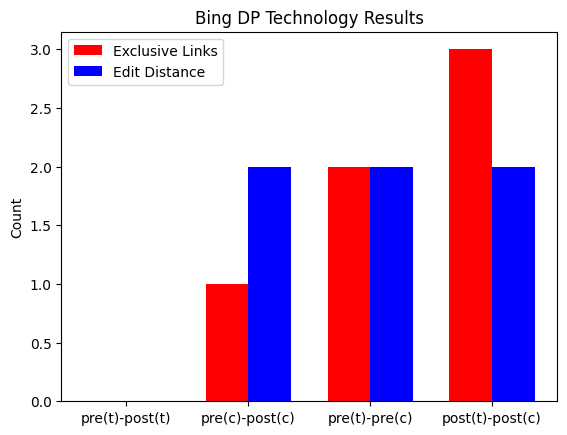

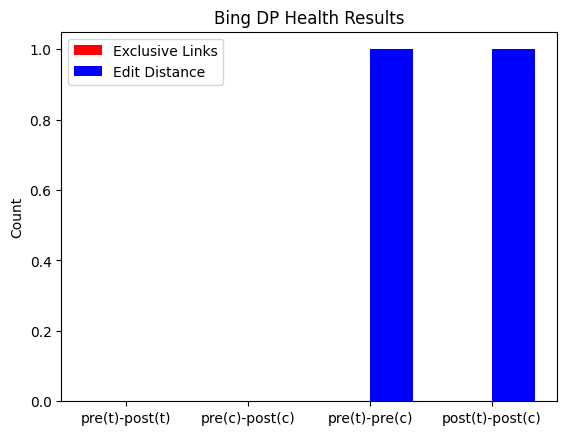

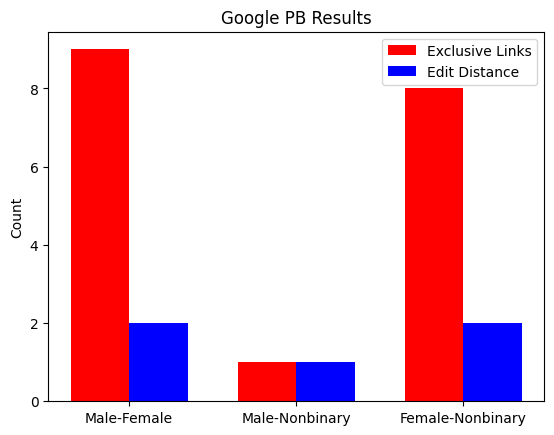

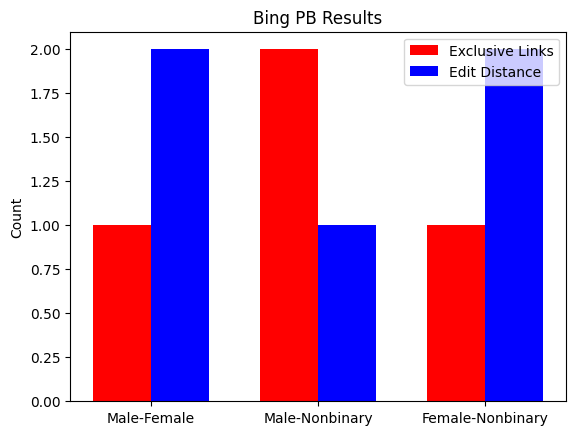

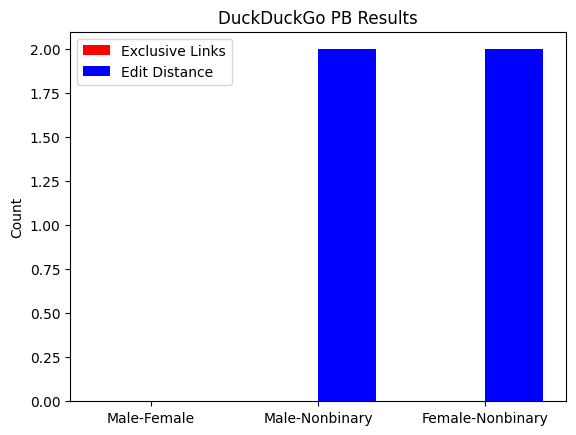

In [2]:
directory_to_open = "/home/meesum/Desktop/ADIP Project/Experiment_Results"
directory_to_plots = "/home/meesum/Desktop/ADIP Project/Experiment_Analysis"
# Call the function to list files in the specified directory
search_engine_results = {}
search_engine_categories = {}
search_engine_categories['Shopping'] = 0
search_engine_categories['News'] = 0
search_engine_categories['Politics'] = 0
search_engine_categories['Technology'] = 0
search_engine_categories['Health'] = 0
search_engine_categories['Sports'] = 0
search_engine_results['bing'] = search_engine_categories.copy()
search_engine_results['ddg'] = search_engine_categories.copy()
search_engine_results['google'] = search_engine_categories.copy()
read_json_files(directory_to_open, search_engine_results)


In [3]:
search_engine_results

{'bing': {'Shopping': 5,
  'News': 10,
  'Politics': 14,
  'Technology': 11,
  'Health': 10,
  'Sports': 6},
 'ddg': {'Shopping': 3,
  'News': 3,
  'Politics': 3,
  'Technology': 7,
  'Health': 3,
  'Sports': 4},
 'google': {'Shopping': 0,
  'News': 2,
  'Politics': 2,
  'Technology': 0,
  'Health': 0,
  'Sports': 0}}